In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    """Load the stock data from a CSV file."""
    data = pd.read_csv(file_path, parse_dates=['date'])
    return data

def plot_price_history(stock_data, permno):
    """Plot BIDLO, ASKHI, PRC, and OPENPRC for a specific stock."""
    stock = stock_data[stock_data['PERMNO'] == permno]

    plt.figure(figsize=(12, 6))
    plt.plot(stock['date'], stock['OPENPRC'], label='Open', alpha=0.7)
    plt.plot(stock['date'], stock['ASKHI'], label='High', alpha=0.7)
    plt.plot(stock['date'], stock['BIDLO'], label='Low', alpha=0.7)
    plt.plot(stock['date'], stock['PRC'], label='Close', alpha=0.7)
    plt.legend(loc='best')
    plt.title(f'Stock {permno} Price History')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

def plot_data_length(stock_data):
    """Plot the length of data available for each stock."""
    data_length = stock_data.groupby('PERMNO')['date'].nunique().sort_values()

    plt.figure(figsize=(12, 6))
    sns.barplot(y=data_length.index.astype(str), x=data_length.values, palette='viridis')
    plt.title('Number of Available Data Points per Stock (PERMNO)')
    plt.xlabel('Number of Data Points')
    plt.ylabel('PERMNO')
    plt.show()

def plot_date_ranges(stock_data):
    """Plot the date ranges for which data is available for each stock."""
    date_ranges = stock_data.groupby('PERMNO').agg(start=('date', 'min'), end=('date', 'max')).reset_index()

    plt.figure(figsize=(12, 6))
    for _, row in date_ranges.iterrows():
        plt.plot([row['start'], row['end']], [row['PERMNO'], row['PERMNO']], marker='o')

    plt.title('Data Availability Ranges per Stock (PERMNO)')
    plt.xlabel('Date')
    plt.ylabel('PERMNO')
    plt.grid(True)
    plt.show()

In [3]:
file_path = './Dataset/raw_data/filtered_stock.csv'  # Replace with your file path
stock_data = load_data(file_path)

In [4]:
len(stock_data['PERMNO'].unique())

3613

In [9]:
stock_data.head()

,PERMNO,BIDLO,ASKHI,PRC,VOL,SHROUT,OPENPRC,RET
date,,,,,,,,
2001-01-02,0,30.181,33.141,31.296,2261684,NaN,33.141,-0.071
2001-01-03,0,29.258,34.756,34.525,4502678,NaN,30.219,0.103
2001-01-04,0,34.025,36.717,35.832,4398388,NaN,34.987,0.038
2001-01-05,0,32.910,35.832,33.872,3277052,NaN,35.217,-0.055
2001-01-08,0,32.180,34.295,32.757,2273288,NaN,33.372,-0.033


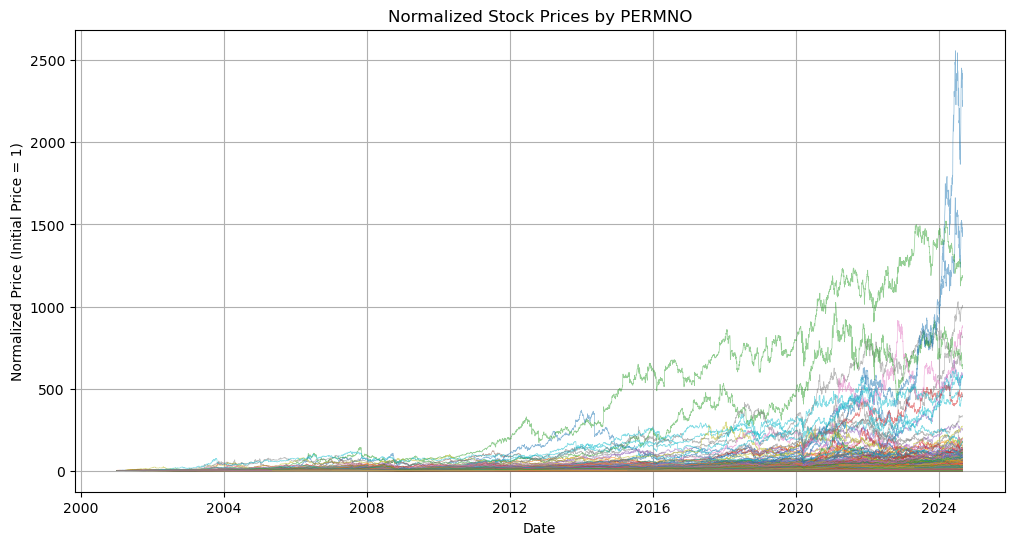

In [6]:
# 메모리 효율적인 방식으로 정규화 및 시각화
# 1. 날짜 인덱스 설정
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data.set_index('date', inplace=True)

# 2. 각 PERMNO별로 순차적으로 처리
plt.figure(figsize=(12, 6))

for permno in stock_data['PERMNO'].unique():
    # 해당 PERMNO의 데이터만 추출
    stock_slice = stock_data[stock_data['PERMNO'] == permno]['PRC']
    
    # 정규화 (초기 가격 = 1)
    normalized = stock_slice / stock_slice.iloc[0]
    
    # 그래프에 추가
    plt.plot(normalized.index, normalized.values, alpha=0.5, linewidth=0.5)

plt.title('Normalized Stock Prices by PERMNO')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Initial Price = 1)')
plt.grid(True)

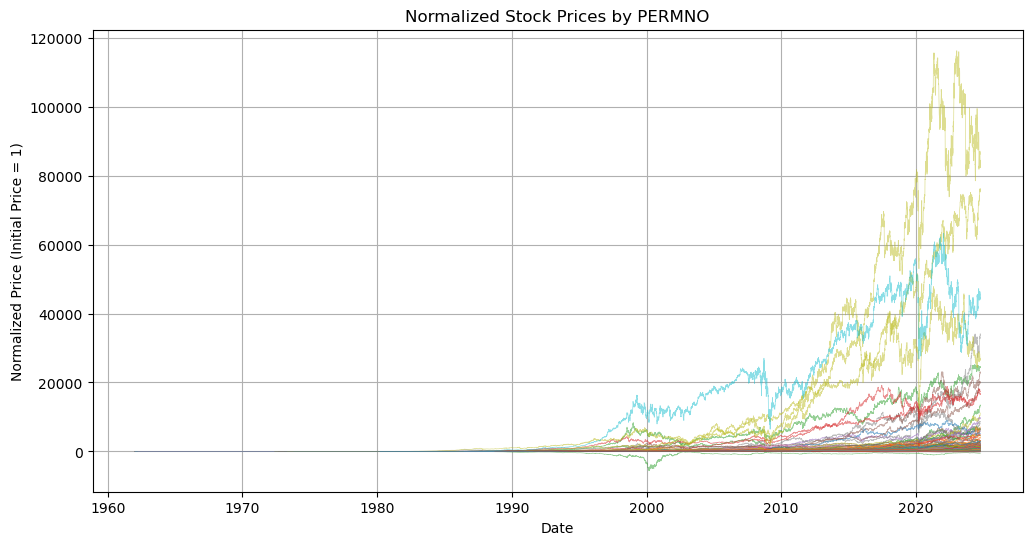

In [20]:
all_path = './Dataset/raw_data/all_data.csv'  # Replace with your file path
all_data = load_data(all_path)

# 메모리 효율적인 방식으로 정규화 및 시각화
# 1. 날짜 인덱스 설정
all_data['date'] = pd.to_datetime(all_data['date'])
all_data.set_index('date', inplace=True)

# 2. 각 PERMNO별로 순차적으로 처리
plt.figure(figsize=(12, 6))

for permno in all_data['PERMNO'].unique():
    # 해당 PERMNO의 데이터만 추출
    stock_slice = all_data[all_data['PERMNO'] == permno]['PRC']
    
    # 정규화 (초기 가격 = 1)
    normalized = stock_slice / stock_slice.iloc[0]
    
    # 그래프에 추가
    plt.plot(normalized.index, normalized.values, alpha=0.5, linewidth=0.5)

plt.title('Normalized Stock Prices by PERMNO')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Initial Price = 1)')
plt.grid(True)

In [11]:
stock_data.reset_index(inplace=True)
stock_data.head()

,date,PERMNO,BIDLO,ASKHI,PRC,VOL,SHROUT,OPENPRC,RET
0,2001-01-02,0,30.181,33.141,31.296,2261684,NaN,33.141,-0.071
1,2001-01-03,0,29.258,34.756,34.525,4502678,NaN,30.219,0.103
2,2001-01-04,0,34.025,36.717,35.832,4398388,NaN,34.987,0.038
3,2001-01-05,0,32.910,35.832,33.872,3277052,NaN,35.217,-0.055
4,2001-01-08,0,32.180,34.295,32.757,2273288,NaN,33.372,-0.033


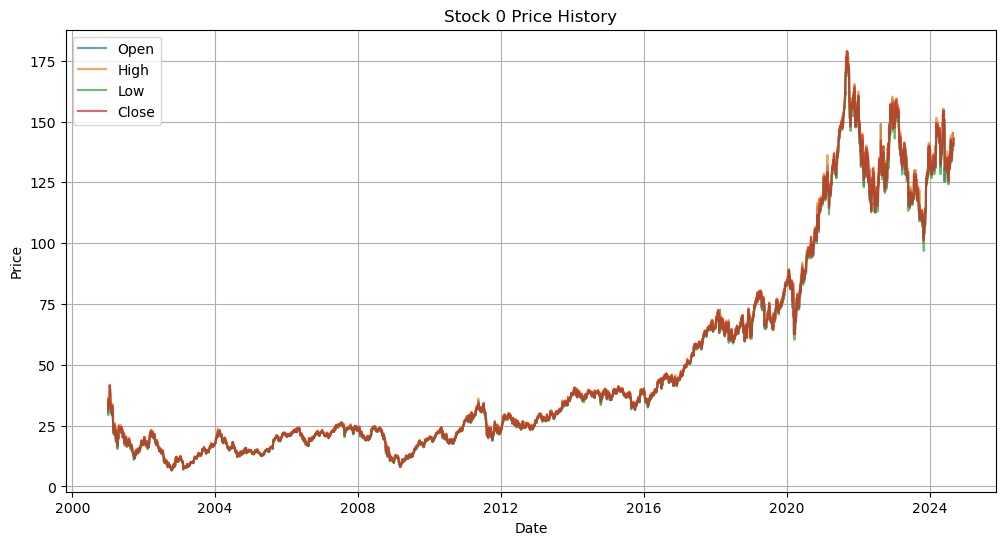

In [12]:
# Set the PERMNO you want to visualize
permno = 0  # Replace with the desired PERMNO

# Visualize the data
plot_price_history(stock_data, permno)


/tmp/ipykernel_594828/613090325.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data_length.index.astype(str), x=data_length.values, palette='viridis')


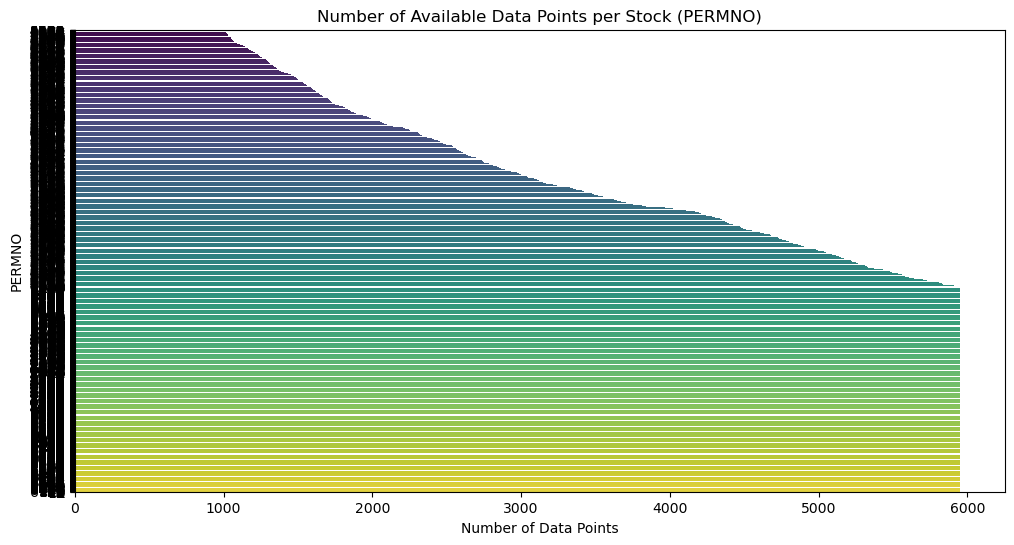

In [13]:
plot_data_length(stock_data)

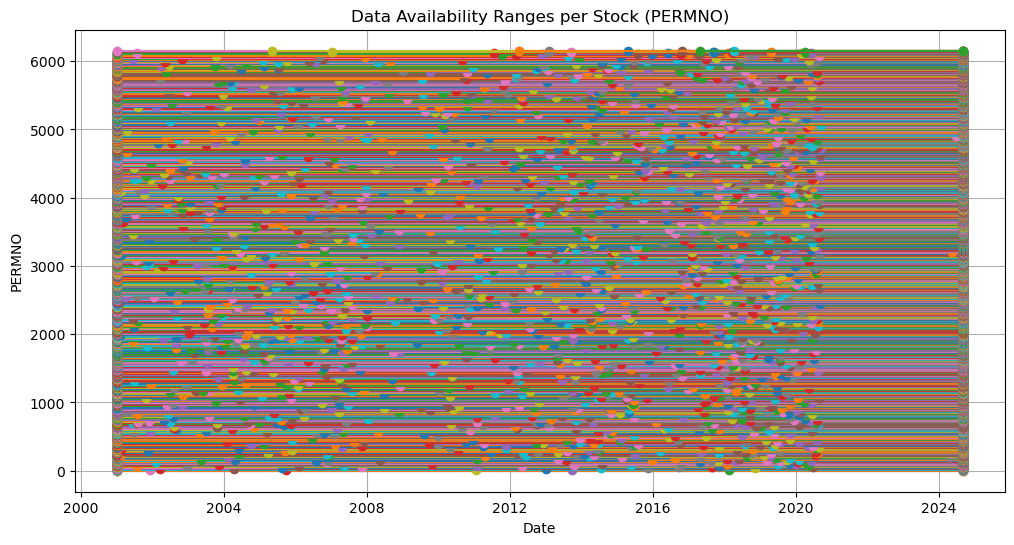

In [14]:
plot_date_ranges(stock_data)

In [19]:
stock_data

,date,PERMNO,BIDLO,ASKHI,PRC,VOL,SHROUT,OPENPRC,RET
0,2001-01-02,0,30.181,33.141,31.296,2261684,NaN,33.141,-0.071
1,2001-01-03,0,29.258,34.756,34.525,4502678,NaN,30.219,0.103
2,2001-01-04,0,34.025,36.717,35.832,4398388,NaN,34.987,0.038
3,2001-01-05,0,32.910,35.832,33.872,3277052,NaN,35.217,-0.055
4,2001-01-08,0,32.180,34.295,32.757,2273288,NaN,33.372,-0.033
...,...,...,...,...,...,...,...,...,...
15580663,2024-08-26,6154,11.345,11.580,11.540,737700,NaN,11.500,0.013
15580664,2024-08-27,6154,11.340,11.660,11.570,450000,NaN,11.510,0.003
15580665,2024-08-28,6154,11.260,11.650,11.380,764400,NaN,11.500,-0.016
15580666,2024-08-29,6154,11.290,11.770,11.720,1054200,NaN,11.460,0.030
